# Python: NumPy and 1D Plots
----
____
____
**Goals for Today**
* Learn basic data manipulation
    * adding/deleting data elements
    * array slicing
    * relevant data processing libraries/tools
    
* Learn the basics of matplotlib
    * 1D plots
    * creating axes labels and titles
    * plot symbology (color, size, etc.)

## Package Import
----
____
Go ahead and import the following packages:
* numpy (as np)
* matplotlib.pyplot (as plt)

NumPy is a package that allows us to better manipulate array data. MatPlotLib is a plotting library.

In [3]:
## insert your code here
import numpy as np
import matplotlib.pyplot as plt

We will also grab some sample data from GitHub

In [1]:
! git clone https://github.com/envgp/sample_jupyter_notebook_data.git

Cloning into 'sample_jupyter_notebook_data'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 0), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


## Data Import
----
____

Go ahead and load in `PRK_test1.txt` and `PRK_test2.txt` as numpy array and save each .txt file as float variable, `test1` and `test2` respectively. 

Once you have loaded in the file, explore the datasets. You can use `np.shape()` to determine the size and dimensions of the array. You can also print the first few lines of each array using a simple for loop. This may look like the following: 
```
print("dataset #1")
for i in range(0,5):
    print(test_1[i])
print("dataset #2")
for i in range(0,5):
    print(test_2[i])

```
This outputs the first five rows of each dataset. 

In [7]:
## insert your code here
test_1 = np.loadtxt('sample_jupyter_notebook_data/PRK_test1.txt')
test_2 = np.loadtxt('sample_jupyter_notebook_data/PRK_test2.txt')

print("dataset #1")
for i in range(0,5):
    print(test_1[i])
print("dataset #2")
for i in range(0,5):
    print(test_2[i])

dataset #1
2129.0
2405.0
2591.0
2793.0
3094.0
dataset #2
1222.0
813.0
790.0
1014.0
1381.0


## Initial interpretation of Data
----
___
From these basic commands, we've learned the following about our data:
* each dataset is a one dimensional array with 1440 entries
*  the values of test 1 are almost double those of test 2

This information is interesting, but we still don't know what the datasets represent, or anything about the data points past the first five entries. To learn more, lets make some very basic plots using `matplotlib`, Python's plotting library. We've already imported `matplotlib` as `.plt`. Similar to using `.np`, to access any of the commands in the `matplotlib` library, we will use the following structure: `plt.desiredCommand()`.  

To plot the first dataset, try the following:
```
plt.plot(test_1)
plt.title("Test one Results")
plt.show()
```

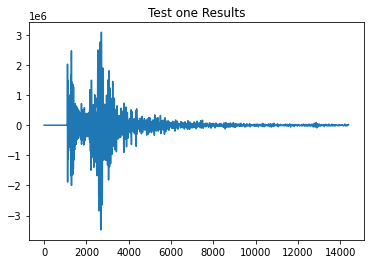

In [9]:
## insert your code here
plt.plot(test_1)
plt.title("Test one Results")
plt.show()

## Developing Plots
----
___
Now that we know what test one looks like, lets try to compare it to test two. There are two ways to do this--plotting the datasets side by side, and plotting them on top of eachother. For fun, lets try both. 

To plot the data sets next to eachother, we'll used the `plt.subplot()` module. For our purposes, this will look like this:
```
plt.subplot(211)
plt.plot(test_1)
plt.title("Test one Results")
plt.subplot(212)
plt.plot(test_2)
plt.title("Test two Results")
plt.tight_layout()
plt.show()
```
within the `plt.subplot()` argument, you'll notice three numbers. The first number tells the function how many rows you'd like to have plots on, the second number tells the function how many columns you'd like to have plots on, and the third number indexes the subplot, meaning it gives the function an order to place the plot. `plt.tight_layout()` simply puts some extra space between the plots so they don't look crowded. 



To plot the datasets on top of eachother, we don't need to use the subplot module. Instead, we'll do the following:
```
plt.plot(test_1,label="test one")
plt.plot(test_2,label="test two")
plt.title("Test one and Test Two Results")
plt.legend()
plt.show()
```
Since we are plotting two things in the same plot, it is very important to create a legend. The `label` arguement in `plt.plot()` titles each plot so it can be properly shown when the command `plt.legend()` is used. 


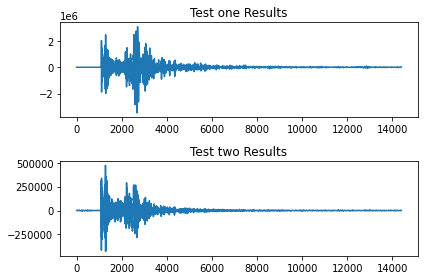

In [10]:
## insert your code here
plt.subplot(211)
plt.plot(test_1)
plt.title("Test one Results")
plt.subplot(212)
plt.plot(test_2)
plt.title("Test two Results")
plt.tight_layout()
plt.show()

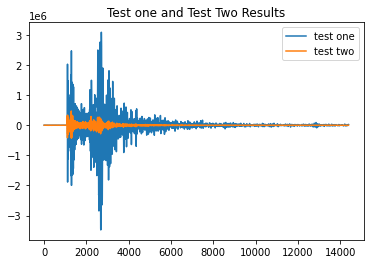

In [11]:
## insert your code here
plt.plot(test_1,label="test one")
plt.plot(test_2,label="test two")
plt.title("Test one and Test Two Results")
plt.legend()
plt.show()

## Improving our interpretation
----
___
Now that we have some plots of our data, we know a lot more about it. Both datasets appear to have two major events, one around x=1000, and one around x=2500. 

After the second event, the data begins to taper, and looks to be irrelevant. Before the first event, the data looks totally flat--there is no signal up until the first event begins. Lets try getting rid of all datapoints after before x=1000 and after x=5000 so we can get a better look at the events. 

In certain programming languages, to remove values, you'd have to implement a for-loop. In Python, however, we can use a very powerful trick--array slicing. To remove all of the data points before x=1000 and after x=5000 using array slicing, use the following command:
```
test1=np.asarray(test_1[1000:5000],dtype=float)
test2=np.asarray(test_2[1000:5000],dtype=float)
```
The first number means to start at that element in the array, the colon indicates that we want to slice the array, and the last number means to end slicing at that place in the array. We also wrap our arguement in `np.asarray(,dtype=float)` to ensure that during the slicing process the data type doesn't accidentally become a string. 

Lets splice our arrays, then create a new set of plots. This time, lets try three subplots: a plot of the sliced first test, a plot of the spliced second test, and a plot of the two sliced datasets overlain on eachother. 

learn more about array slicing [here](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) and [here](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/)

In [12]:
test_1=np.asarray(test_1[1000:5000],dtype=float)
test_2=np.asarray(test_2[1000:5000],dtype=float)

## Improving our plots
----
___

Wow! These plots are great, and we are begining to see some cool things in our data--well sort of. As you probably noticed, these plots are tiny. To improve this, we will make use of the `plt.figure()` function. For fun, let's also make our font sizes bigger. Lets try:

```
plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(test1)
plt.title("Test one Results", fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(312)
plt.plot(test2)
plt.title("Test two Results", fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(313)
plt.plot(test1,label="test one")
plt.plot(test2,label="test two")
plt.title("Test one and Test two Results", fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Number of Points")
plt.ylabel("Amplitude")
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()
```


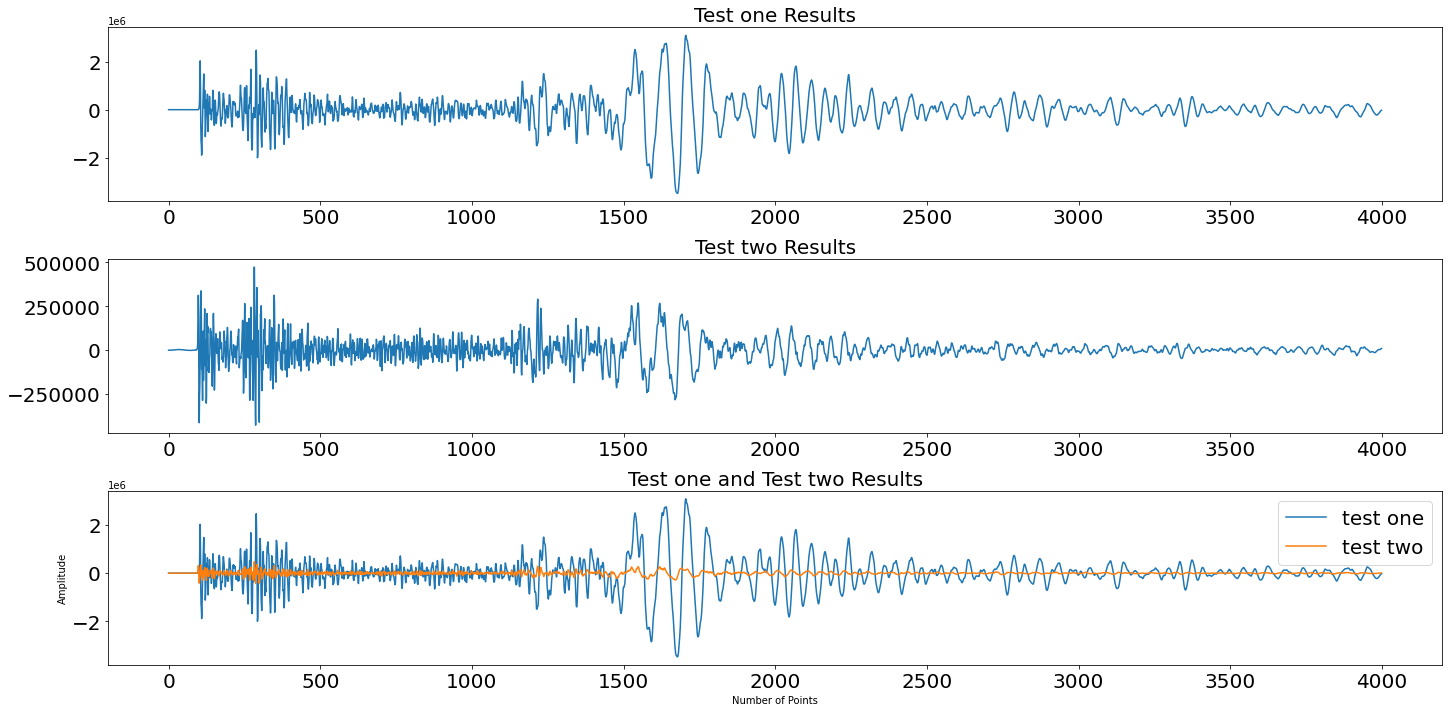

In [14]:
##insert your code here
plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(test_1)
plt.title("Test one Results", fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(312)
plt.plot(test_2)
plt.title("Test two Results", fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(313)
plt.plot(test_1,label="test one")
plt.plot(test_2,label="test two")
plt.title("Test one and Test two Results", fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Number of Points")
plt.ylabel("Amplitude")
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

## So what the heck am I looking at?
----
___
Now that your plots look great, its time to determine what exactly you're looking at. As mentioned earlier, both datasets appear to have two major events. They also have a lose wave-like structure, with an amplitude that changes in response to each event. 

Any ideas what this could be? 

If you guessed a seismogram--a recording of a seismic event--you are correct! Both datasets are actually seismic responses to North Korean nuclear tests. Specifically, they are ground motion signals arriving at the MDJ seismic station located in Mudanjiang, Heilongjiang Province, China. The first dataset was collected on 09/03/2017 and the second dataset was collected a year earlier, on 09/09/2016. 

There are three features that we can easily identify in these datasets: 
* the P-wave arrival: occurs around x=100
* the S-wave arrival: occurs around x=300
* the surface waves: become prominent around x=1500

If you aren't familar with these wave types, check out [this website](http://www.geo.mtu.edu/UPSeis/waves.html) for an easy to read resource. It will be very useful to know what the data means as you manipulate it! Additionally, [this website](http://www.geo.mtu.edu/UPSeis/reading.html) and [this one (pages 1 and 2)](http://www.iris.edu/hq/files/programs/education_and_outreach/aotm/17/SeismicSignatures_SeismogramMSH%20addition.pdf) give some good information on reading seismograms. Lastly, [this](http://seismo.berkeley.edu/blog/2009/05/25/of-nuclear-bombs-and-earthquakes.html) is a great blog post that explains specifically how to interpret seismograms that are sourced from nuclear explosions. 

## Basic Math with NumPy Arrays
----
___
As we've mentioned in class, NumPy makes it very easy to add, subtract, divide, and multiply arrays. To test this, let's try the following with our dataset:
* find the percent difference in P-wave and S-wave arrival waves in the test one dataset
* determine how much larger the 2017 event's magnitude is compared to that of the 2016 event

### comparing S waves and P waves
As you gathered from the first website cited in the cell above, P-waves and S-waves are both considered types of body waves. P-waves are compression waves, meaning that they apply a force in the direction of propegation. The earth's interior is almost totally incompressible, so P-waves transmit their energy easily, thus traveling quickly through the earth, leaving a seismic signature relatively small in magnitude. S-waves on the other hand are shear waves, and move perpendicular to the to the earth's interior. Energy is not as efficiently transmitted this way, so S-waves move more slowly through the earth, leaving a larger seismic signature. On average, P-waves move 60% faster than S waves! 

I am interested in seeing how big the magnitude difference between the arrival of each wave is. To do this, the first thing I need to do is find where exactly each arrival wave is. Since we know that the P-wave arrives somewhere around x=100 and the P-wave arrives somewhere around x=300, using array slicing, we can create an array that allows us to look specifically during this time period. Let's create this array for the first test via the following code:
```
range_s=test_1[0:300]
```
We also know that during ``PSrange``, the P-wave arrival will have the largest spike, and the S-wave arrival will have the second largest spike. using np.amax() and np.where() we can find where each arrival is. 
First let's find the S-wave using the following code snippet:

```
y_s=np.amax(range_s)
x_s=np.where(range_s==y_s)
print("The x location of the S-wave arrival is: %f \n The Y location of the S-wave arrival is %s" % (x_s[0],y_s))
```
You should get (xS,yS)=(289, 2472638) for the S-wave arrival coordinate. 

To find the P-wave, we can repeat the same process, but with a smaller array slice. Try:
```
range_p=test_1[0:110]
y_p=np.amax(range_p)
x_p=np.where(range_p==y_p)
print("The x location of the P-wave arrival is: %f \n The Y location of the S-wave arrival is %s" % (x_p[0],y_p))
```
Note: to avoid indexing errors, it is typically easier to slice an array starting 0. 


In [19]:
##insert your code here
range_s=test_1[0:300]

y_s=np.amax(range_s)
x_s=np.where(range_s==y_s)
print("The x location of the S-wave arrival is: %f \n The Y location of the S-wave arrival is %s" % (x_s[0],y_s))

range_p=test_1[0:110]
y_p=np.amax(range_p)
x_p=np.where(range_p==y_p)
print("The x location of the P-wave arrival is: %f \n The Y location of the S-wave arrival is %s" % (x_p[0],y_p))

The x location of the S-wave arrival is: 289.000000 
 The Y location of the S-wave arrival is 2472638.0
The x location of the P-wave arrival is: 104.000000 
 The Y location of the S-wave arrival is 2028848.0


### Comparing P and S waves (continued)

using `yS` and `yP`, lets figure out how much bigger the S-wave arrival is than the P-wave arrival. To do this, we will used the normalized percent increase equation:
$$
\% increase=\frac{y_s-y_p}{y_S}*100
$$

Coding up this equation using NumPy arrays is very simple. Try:
```
percent_increase=(y_s-y_p)/(y_s)*100
```
or alternatively:
```
percent_increase=np.multiply(np.divide(np.subtract(y_s,y_p),y_s),100)
```
On your own, try getting the output to say something like "The S-wave arrival is `percentIncrease` percent bigger than the P-wave arrival. Be sure to use the actual variable, `percentIncrease` in your output! 

In [21]:
##insert your code here
percent_increase=(y_s-y_p)/(y_s)*100

### Comparing test one to test two
So we now know how to compare one specific point in a dataset to another, but how can we compare two complete datasets to eachother? First, lets take the exact same approach that we took to find the percent increase between the P and S-wave arrivals. 

Try: 
```
percent_increase_1=(np.abs(test_1)-np.abs(test_2))/(test_1)*100
```
Note: We use `np.abs()` because these datasets have positive and negative values, and ultimately, we only care about the magnitude of difference and want to avoid sign errors. 


This method will result in an array, where each point in test one has been subtracted and divided by each point in test two. Go ahead and make a simple plot of the data. 

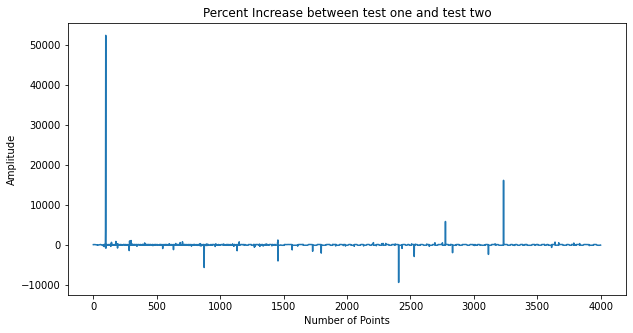

In [23]:
##insert your code here
percent_increase_1=(np.abs(test_1)-np.abs(test_2))/(test_1)*100

plt.figure(figsize=(10,5))
plt.plot(percent_increase_1)
plt.xlabel("Number of Points")
plt.ylabel("Amplitude")
plt.title("Percent Increase between test one and test two")
plt.show()

### Comparing test one to test two (continued)
This plot looks super wonky--there are a few huge outlying points, but everything else looks like there's almost no difference. If you zoom in on the plot by including `plt.ylim(-1000,1000)` in your figure commands, things look even weirder. This is because though the events of the datasets basically line up, each point in test one is off by just a little bit from its counterpart in test two. Thus, the method of comparing each point to its counterpart doesn't really work. See what I mean by plotting:
```
plt.figure(figsize=(10,5))
plt.plot(test1)
plt.plot(test2)
plt.xlabel("Number of Points")
plt.ylabel("Amplitude")
plt.xlim(100,300)
plt.show()
```

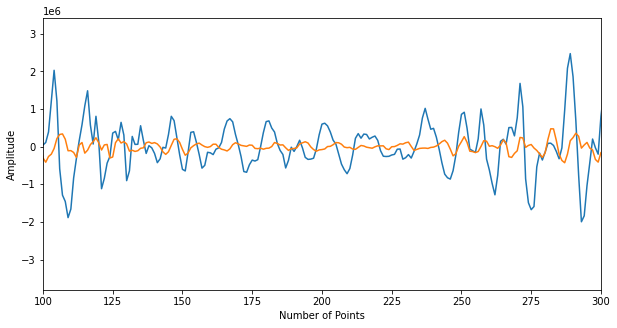

In [24]:
##insert your code here
plt.figure(figsize=(10,5))
plt.plot(test_1)
plt.plot(test_2)
plt.xlabel("Number of Points")
plt.ylabel("Amplitude")
plt.xlim(100,300)
plt.show()

### Comparing test one to test two (continued)
As the plot shows, the wave peaks are off just a little bit. This is because `test2` is so much smaller than `test1` that it is propegating through the earth more slowly, creating longer periods. 
Because we are just looking for a total percent difference anyway, we don't have to do any hardcore signal manipulation to our data to make the peaks match up (save this for seismic data processors!). Instead, we will take the absolute mean of each dataset, then calculate percent difference from out average values.

Try:
```
test_1_mean=np.mean(np.abs(test_1))
test_2_mean=np.mean(np.abs(test_2))
percent_increase_tot=(test_1_mean-test_2_mean)/(test_1_mean)*100
print("test one is %f percent bigger than test two" %percent_increase_tot)
```

In [25]:
##insert your code here
test_1_mean=np.mean(np.abs(test_1))
test_2_mean=np.mean(np.abs(test_2))
percent_increase_tot=(test_1_mean-test_2_mean)/(test_1_mean)*100
print("test one is %f percent bigger than test two" %percent_increase_tot)

test one is 89.955340 percent bigger than test two


# Holy Guacamole, what a difference a year can make! 
<img src="https://media2.giphy.com/media/wUTUBrRYwxMVW/giphy.gif" \>

## Predicting nuclear test strength over the next 10 years
----
___
Now that we know the percent growth from one year to the next, we can use a fitting model to determine how much stronger the DPRK's nuclear weaponry will be 10 years from now. There are an infinite number of models we can use, but for simplicity, we are going to try two simpler ones: a linear fit and an exponential fit.

### Predicting percent increase in strength using a linear fit:
Right now, we have two sets of coordinates: $(x_{test1},y_{test1}), (x_{test2},y_{test2})$ where
* $x_{test1}$=2017
* $y_{test1}$=`test_1_mean`
* $x_{test2}$=2016
* $y_{test2}$=`test_2_mean`. 

Using these points and some basic algebra, we can find the slope of the line between our data, $m$. Recall:
$$
m=\frac{y_2-y_1}{x_2-x_1}
$$
applied to our coordinates: 
$$
m=\frac{y_{test1}-y_{test2}}{x_{test1}-x_{test2}}
$$

Up until now, time has been relative, so we have been working with 1D arrays. This equation is relatively simple to code up, but to do it, we need to actually introduce a time variable, in this case the year. We know that `test1` was recorded in 2017, and `test2` was recorded in 2016, so we can do the following:
```
tests=[test_2_mean,test_1_mean]
year=[2016,2017]
```
This creates two seperate 1D arrays, one for time, and one for the mean test values. We could have also done something like: 
```
test1=[2017,test_1_mean]
test2=[2016,test_2_mean]
``` 
however as we continue on, you will see that it is easier to keep track of your arrays if you seperate them by variable type, and not by coordinates. 

We know that the 2017 test is `percentIncreaseTot`=89% bigger than the 2016 test. If we follow this same liner trajectory, than the 2018 test will be 89% bigger than 2017, 2019 will be 89% bigger than 2018, and so on. We can use this trajectory to find the correct slope, `m`, for our linear model.  

To start, lets initialize our new arrays and plot what we have so far:
```
tests=[test_2_mean,test_1_mean]
year=[2016,2017]

plt.plot(year[0],tests[0],'bo',)
plt.plot(year[1],tests[1],'bo')
plt.plot(year,tests, 'g')
plt.title("The Average strength of DPRK Nuclear Tests")
plt.show()
```
The `'bo'` arguement in the `plt.plot()` function simply makes the point a blue dot, and `g` makes the line green



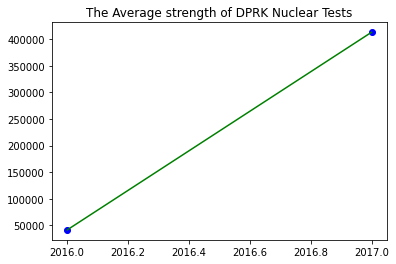

In [26]:
##insert your code here
tests=[test_2_mean,test_1_mean]
year=[2016,2017]

plt.plot(year[0],tests[0],'bo',)
plt.plot(year[1],tests[1],'bo')
plt.plot(year,tests, 'g')
plt.title("The Average strength of DPRK Nuclear Tests")
plt.show()

### Predicting percent increase in strength using a linear fit (continued):
To predict the mean test strength 10 years from now (2028), we need to formulate each of the variables for the green line plotted in the equation above. Recall:
$$
y=mx+b
$$
$$
m=\frac{y_2-y_1}{x_2-x_1}
$$
$$
b=y_0
$$
Now, we could go through and solve for each of these variables manually, or by using basic math functions, but NumPy's linear algebra module, `np.linalg()` has a function `np.linalg.lstsq()` that will solve for $m$ and $b$ for us. Lets try it:
```
A = np.vstack([year, np.ones(len(year))]).T
m, b = np.linalg.lstsq(A, tests)[0]
```
You can check out the docs for `np.linalg.lstsq()` [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)



In [27]:
##insert your code here
A = np.vstack([year, np.ones(len(year))]).T
m, b = np.linalg.lstsq(A, tests)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


### Predicting percent increase in strength using a linear fit (continued):
To generate some x values, we will initialze an array that has years 2016-2028 using `np.arange()`. 
this will look like:
```
x=np.arange(2016,2029)
```
Remember, we want years up to (and including) 2028. Therefore, we need to add one to the index!
Now that we have $m,x,b$ we can find variable $y$, the absolute mean strength of the test, for each year using the linear fit equation, $y=mx+b$.

Let's make y and modify our initial plot to include it. 
```
y=m*x+b

plt.plot(x,y)
plt.plot(year[0],tests[0],'bo',label="recorded values")
plt.plot(year[1],tests[1],'bo')
plt.plot(x[12],y[12], 'ro', label="2028 prediction")
plt.title("The Average strength of DPRK Nuclear Tests") 
plt.xlabel("year")
plt.ylabel("Absolute mean strength")
plt.legend()
plt.show()
```
Note the usage of `plt.xlabel()` and `plt.ylabel()`. 

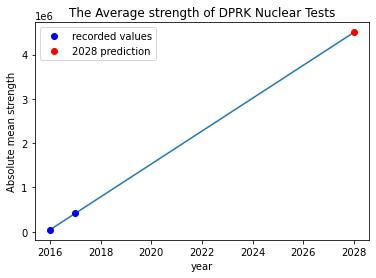

In [28]:
##insert your code here

x=np.arange(2016,2029)

y=m*x+b

plt.plot(x,y)
plt.plot(year[0],tests[0],'bo',label="recorded values")
plt.plot(year[1],tests[1],'bo')
plt.plot(x[12],y[12], 'ro', label="2028 prediction")
plt.title("The Average strength of DPRK Nuclear Tests") 
plt.xlabel("year")
plt.ylabel("Absolute mean strength")
plt.legend()
plt.show()

## Correlating our prediction back to our known points
The last thing we are going to do is determine just how much larger our 2028 prediction is than the known 2016 test. To do this, use the same percent increase formula that you used to make `percent_increase_tot`.

In [29]:
##insert your code here
percent_increase_tot=(y[12]-y[0])/(y[0])*100
print("test one is %f percent bigger than test two" %percent_increase_tot)

test one is 10746.646770 percent bigger than test two
